In [1]:
# Common imports
import numpy as np
import numpy.random as rnd
import os
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("data/")

x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [9]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 500
n_hidden2 = 300
n_hidden3 = 100
n_outputs = 10
learning_rate = 0.01



x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
y = tf.placeholder(tf.int32, shape=(None), name="y")


# Create model
def neural_net(x):
    
    hidden1 = tf.layers.dense(x, n_hidden1,name="hidden1", activation=tf.nn.sigmoid)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.sigmoid)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3", activation=tf.nn.sigmoid)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")
    return logits


logits=neural_net(x)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")



# optimizer = tf.train.GradientDescentOptimizer(learning_rate)
# optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov=True)
#optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
#optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,momentum=0.9, decay=0.9, epsilon=1e-10)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)



correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
batch_size = 100

loss_vec = []
train_accuracy = []
test_accuracy = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(x_train)//batch_size):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={x: x_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={x: x_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={x: x_test, y: y_test})
        
        train_accuracy.append(acc_train)

        test_accuracy.append(acc_test) 
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "models/dnn_final.ckpt")

0 Train accuracy: 0.972491 Test accuracy: 0.9661
1 Train accuracy: 0.976164 Test accuracy: 0.9688
2 Train accuracy: 0.962527 Test accuracy: 0.9561
3 Train accuracy: 0.984618 Test accuracy: 0.9709
4 Train accuracy: 0.983491 Test accuracy: 0.9718
5 Train accuracy: 0.985618 Test accuracy: 0.9717
6 Train accuracy: 0.986509 Test accuracy: 0.9747
7 Train accuracy: 0.988036 Test accuracy: 0.9748
8 Train accuracy: 0.9832 Test accuracy: 0.9713
9 Train accuracy: 0.985345 Test accuracy: 0.9719
10 Train accuracy: 0.990673 Test accuracy: 0.9781
11 Train accuracy: 0.9858 Test accuracy: 0.9716
12 Train accuracy: 0.990618 Test accuracy: 0.9761
13 Train accuracy: 0.9886 Test accuracy: 0.9747
14 Train accuracy: 0.990673 Test accuracy: 0.9766
15 Train accuracy: 0.988236 Test accuracy: 0.9748
16 Train accuracy: 0.990291 Test accuracy: 0.9747
17 Train accuracy: 0.987545 Test accuracy: 0.9738
18 Train accuracy: 0.988964 Test accuracy: 0.9753
19 Train accuracy: 0.990782 Test accuracy: 0.9749


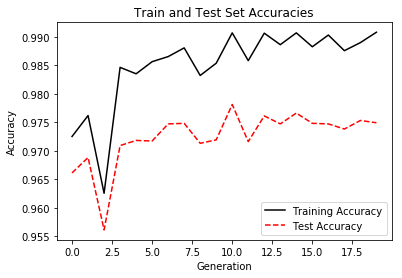

In [10]:
# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

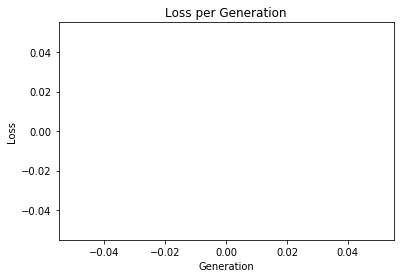

In [11]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()